## Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

### Задание 1
Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [191]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [192]:
# сгенерируем набор данных:
X, Y, coef = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2,
                                      n_targets=1, noise=5, coef=True, random_state=2)

X[:, 0] *= 10  #искусственно увеличим первый признак, чтобы потом провести стандартизацию
#display(X, Y, coef)

In [193]:
X.shape

(1000, 2)

Отмасштабируем признаки методом стандартизации:

In [194]:
# Получим средние значения и стандартное отклонение по столбцам:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

display(means, stds)

array([-0.79012702,  0.02045785])

array([9.85635367, 0.99101454])

In [195]:
# вычтем из каждого значения признака среднее и поделим на стандартное отклонение:
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j]
    
X

array([[ 0.46447924, -0.64462559],
       [-0.58228272, -1.09738549],
       [-1.00118525, -0.3706113 ],
       ...,
       [ 1.29208317,  0.98990825],
       [ 0.20761816,  0.33516651],
       [ 0.02259069,  0.39523966]])

In [196]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

display(means, stds) # после стандартизации признаков получили среднее в нуле и среднее квадратичное отклонение, равное 1

array([-2.40328590e-17,  9.54791801e-18])

array([1., 1.])

In [197]:
# функция нахождения MSE:
def mse_error(X, w, y):
    y_pred = X.dot(w)
    return (sum((y_pred - y)**2))/len(y)

Градиентный спуск:

In [198]:
%time

n = Y.shape[0]
w = np.zeros(X.shape[1])
w_list_gd = [w.copy()]
errors_gd = []

# Задаем шаг и максимальное число итераций:
eta = 0.01
max_iter =1e4

# Задаем критерий сходимости (разница весов, при которой алгоритм останавливается) и начальную разницу весов:
min_weight_dist = 1e-8
weight_dist = np.inf

iter_num = 0

while weight_dist > min_weight_dist and iter_num < max_iter:
    y_pred = X.dot(w)
    new_w = w - eta * 2 / n * np.dot(X.T, (y_pred - Y))
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    error = mse_error(X, new_w, Y)
    w_list_gd.append(new_w.copy())
    errors_gd.append(error)
    
    if iter_num % 100 == 0:
        print(f'Iteration #: {iter_num}: new_w = {new_w}, MSE = {round(error, 2)}')
        
    iter_num+=1
    w = new_w
    
w_list_gd = np.array(w_list_gd)
print(f'В случае использования классического градиентного спуска ошибка составляет {round(errors[-1], 4)}')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
Iteration #: 0: new_w = [1.19602793 1.32362532], MSE = 7875.58
Iteration #: 100: new_w = [53.00350458 58.46260608], MSE = 190.62
Iteration #: 200: new_w = [60.25620569 66.38834625], MSE = 41.52
Iteration #: 300: new_w = [61.27105576 67.48815951], MSE = 38.63
Iteration #: 400: new_w = [61.41300062 67.64082996], MSE = 38.57
Iteration #: 500: new_w = [61.43284656 67.66202988], MSE = 38.57
Iteration #: 600: new_w = [61.43562035 67.6649746 ], MSE = 38.57
Iteration #: 700: new_w = [61.43600792 67.66538374], MSE = 38.57
Iteration #: 800: new_w = [61.43606205 67.6654406 ], MSE = 38.57
Iteration #: 900: new_w = [61.43606961 67.6654485 ], MSE = 38.57
В случае использования классического градиентного спуска ошибка составляет 38.5683


Стохастический градиентный спуск:

In [199]:
%time
n = Y.shape[0]
w = np.zeros(X.shape[1])
w_list_sgd = [w.copy()]
errors_sgd = []

eta = 0.01
max_iter =1e4
min_weight_dist = 1e-8
weight_dist = np.inf

iter_num = 0

np.random.seed(1234)

# ход SGD:
while weight_dist > min_weight_dist and iter_num < max_iter:
     # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    y_pred = X[train_ind].dot(w)
    new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    error = mse_error(X, new_w, Y)
    errors_sgd.append(error)
    w_list_sgd.append(new_w.copy())
    
    if iter_num % 1000 == 0:
        print(f'Iteration #: {iter_num}: new_w = {new_w}, MSE = {round(error, 2)}')
        
    iter_num+=1
    w = new_w
    
w_list_sgd = np.array(w_list_sgd)

print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors[-1], 4)}')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Iteration #: 0: new_w = [-0.8770491   1.16866253], MSE = 8143.11
Iteration #: 1000: new_w = [61.07861683 67.98386733], MSE = 38.8
Iteration #: 2000: new_w = [62.29173881 67.78620694], MSE = 39.31
Iteration #: 3000: new_w = [61.33422363 68.2796771 ], MSE = 38.96
Iteration #: 4000: new_w = [61.8446162  67.21734303], MSE = 38.94
Iteration #: 5000: new_w = [59.62680026 68.25992513], MSE = 42.25
Iteration #: 6000: new_w = [60.7603246 68.1133713], MSE = 39.24
Iteration #: 7000: new_w = [60.44692874 68.75819781], MSE = 40.79
Iteration #: 8000: new_w = [62.15069156 68.07171131], MSE = 39.23
Iteration #: 9000: new_w = [61.16347289 67.56723337], MSE = 38.65
В случае использования стохастического градиентного спуска ошибка составляет 38.5683


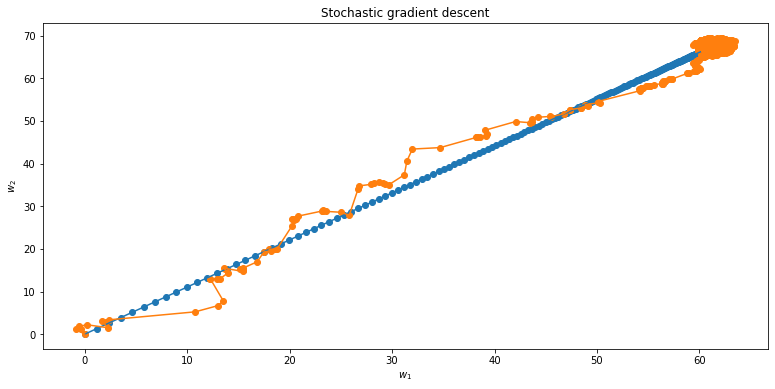

In [200]:
# Визуализируем изменение весов
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_gd[:, 0], w_list_gd[:, 1])
plt.scatter(coef[0], coef[1], c='r', marker='v')
plt.plot(w_list_gd[:, 0], w_list_gd[:, 1])

plt.scatter(w_list_sgd[:, 0], w_list_sgd[:, 1])
plt.plot(w_list_sgd[:, 0], w_list_sgd[:, 1])

plt.show()

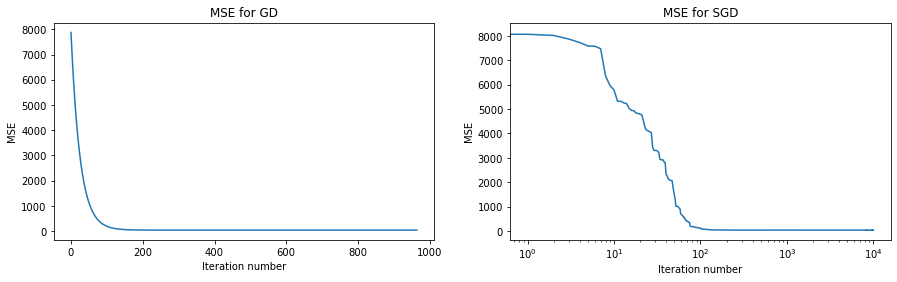

In [201]:
# Визуализируем изменение функционала ошибки
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
ax1, ax2 = axs
ax1.plot(range(len(errors_gd)), errors_gd)
ax2.plot(range(len(errors_sgd)), errors_sgd)
ax1.set_title('MSE for GD')
ax2.set_title('MSE for SGD')
ax1.set_xlabel('Iteration number')
ax1.set_ylabel('MSE')
ax2.set_xlabel('Iteration number')
ax2.set_ylabel('MSE')
ax2.set_xscale('log')

plt.show()

#### Выводы о разнице скорости сходимости каждого из методов:
Для стохастического градиентного спуска для достижения сходимости нужно намного большее количество итераций, но при этом алгоритм работает быстрее. Время на GD - 5.01 µs, время на SGD - 3.81 µs. Также по графику SGD видно, он немонотонный, так как мы уменьшаем на каждой итерации ошибку только на одном объекте, но при этом есть вероятность увеличить ее на другом объекте.

### Задание 2
Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE добавить норму весов, а в поправку нужно добавить производную для нормы вектора весов по весам) и сравнить результаты.

In [202]:
# L2-регуляризация:
def mse_err_reg_l2(X, w, y, alpha=1e-8):
    y_pred = X.dot(w)
    Q = (sum((y_pred - y)**2))/len(y)
    reg = alpha* sum(w**2)
    return (Q + reg)

In [203]:
%time
n = Y.shape[0]
w = np.zeros(X.shape[1])
w_list_sgd_lr2 = [w.copy()]
errors_sgd_lr2 = []

eta = 0.01 # шаг спуска
reg = 1e-8 # коэффициент регуляризации
max_iter =1e4
min_weight_dist = 1e-8
weight_dist = np.inf

iter_num = 0

np.random.seed(1234)

# ход SGD:
while weight_dist > min_weight_dist and iter_num < max_iter:
     # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    y_pred = X[train_ind].dot(w)
    dQ = 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind]) #градиент функции ошибки
    dReg = 2* reg * w # производная для нормы вектора весов по весам
    new_w = w - eta *(dQ + dReg) 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    error = mse_err_reg_l2(X, new_w, Y)
    errors_sgd_lr2.append(error)
    w_list_sgd_lr2.append(new_w.copy())
    
    if iter_num % 1000 == 0:
        print(f'Iter #: {iter_num}: new_weights = {new_w}, error = {round(error, 2)}')
        
    iter_num+=1
    w = new_w
    
w_list_sgd_lr2 = np.array(w_list_sgd_lr2)

print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors_sgd_lr2[-1], 4)}, число итераций:{iter_num}')

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.1 µs
Iter #: 0: new_weights = [-0.8770491   1.16866253], error = 8143.11
Iter #: 1000: new_weights = [61.07861625 67.98386666], error = 38.8
Iter #: 2000: new_weights = [62.29173809 67.78620633], error = 39.31
Iter #: 3000: new_weights = [61.33422314 68.27967659], error = 38.96
Iter #: 4000: new_weights = [61.84461549 67.21734271], error = 38.94
Iter #: 5000: new_weights = [59.62679969 68.25992438], error = 42.25
Iter #: 6000: new_weights = [60.76032399 68.1133706 ], error = 39.24
Iter #: 7000: new_weights = [60.44692829 68.75819722], error = 40.79
Iter #: 8000: new_weights = [62.1506908  68.07171047], error = 39.23
Iter #: 9000: new_weights = [61.16347217 67.56723275], error = 38.65
В случае использования стохастического градиентного спуска ошибка составляет 39.0067, число итераций:10000


После L2-регуляризации показатель ошибки увеличился (39.0067 против 38.5683 без регуляризации). Значения коэффициентов в нашем случае снизились в шестом знаке после запятой, взяла небольшой коэффициент регуляризации. 